In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Exploratory Data Analysis (EDA)

### Target

In [3]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

#### Numeric VS Target

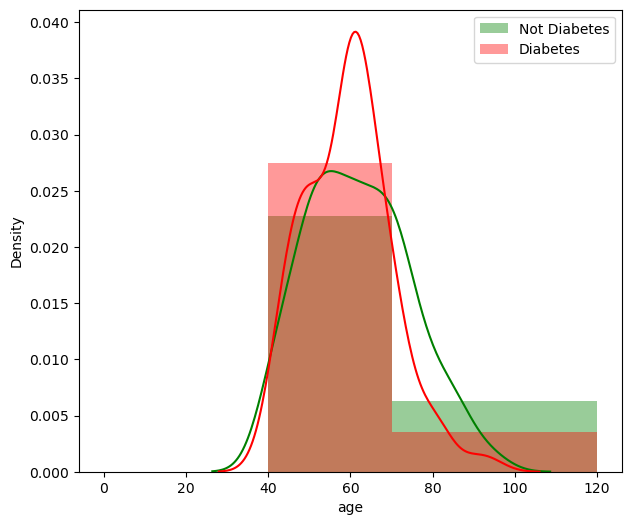

In [4]:
plt.figure(figsize=(7, 6))
sns.distplot(df.age[df.diabetes == 0], bins=[0, 18, 40, 70, 120], color="g", label="Not Diabetes")
sns.distplot(df.age[df.diabetes == 1], bins=[0, 18, 40, 70, 120], color="r", label="Diabetes")
plt.legend();

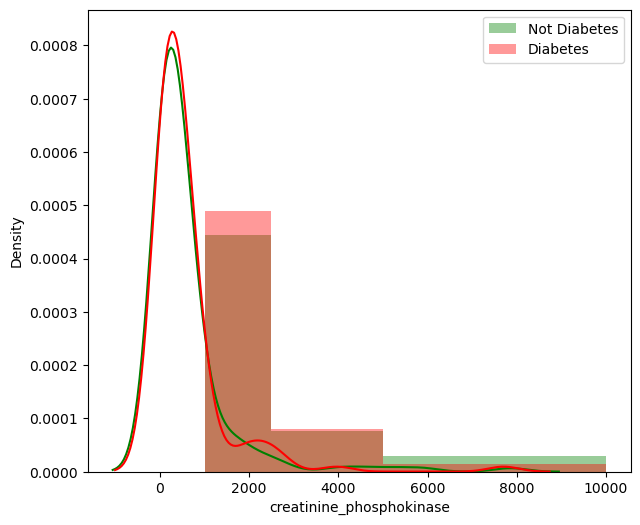

In [5]:
plt.figure(figsize=(7, 6))
sns.distplot(df.creatinine_phosphokinase[df.diabetes == 0], bins=[1000, 2500, 5000, 10000], color="g", label="Not Diabetes")
sns.distplot(df.creatinine_phosphokinase[df.diabetes == 1], bins=[1000, 2500, 5000, 10000], color="r", label="Diabetes")
plt.legend();

#### Categoric / Ordinal VS Target

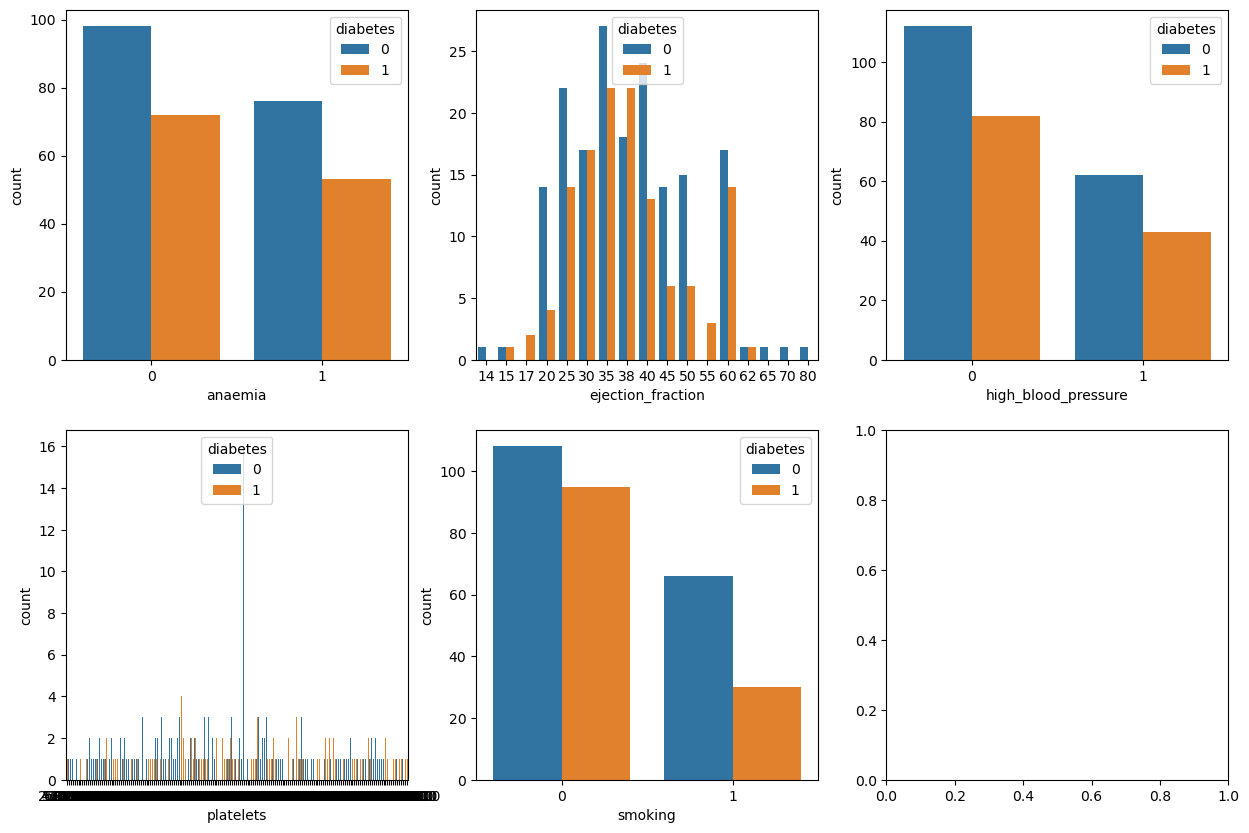

In [6]:
cat_var = ["anaemia", "ejection_fraction", "high_blood_pressure", "platelets", "smoking"]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="diabetes", ax=ax)

# male vs female frequency

In [7]:
df2 = df.copy()

In [8]:
df2['sex'].replace({1:'male', 0:'female'}, inplace=True)
df2['sex'].value_counts()

male      194
female    105
Name: sex, dtype: int64

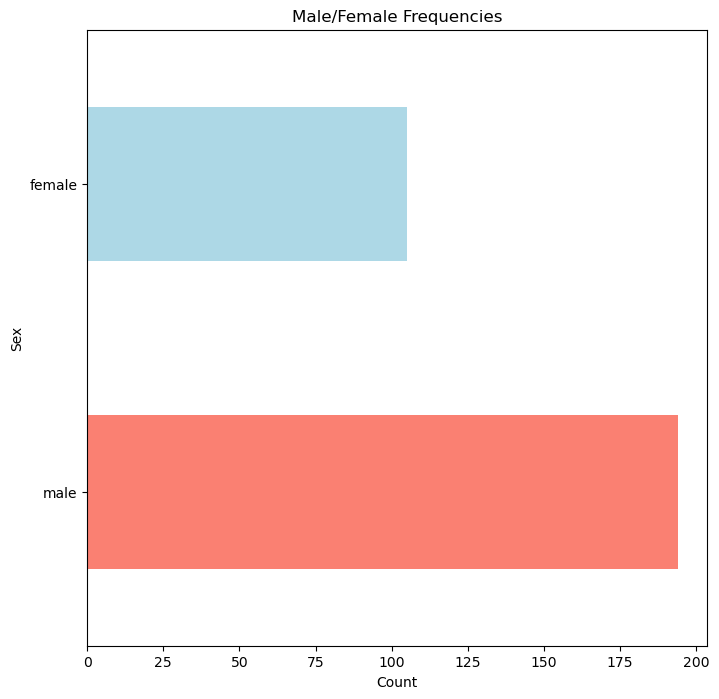

In [9]:
plt.figure(figsize=(8,8))
df2['sex'].value_counts().plot.barh(color=['salmon','lightblue'])
plt.title('Male/Female Frequencies')
plt.ylabel('Sex')
plt.xlabel('Count')
plt.show()

# Find out the correlation between the patient's death and the disease

In [10]:
df2['DEATH_EVENT'].replace({1:'yes', 0:'no'}, inplace=True)

In [11]:
df2['DEATH_EVENT'].value_counts()

no     203
yes     96
Name: DEATH_EVENT, dtype: int64

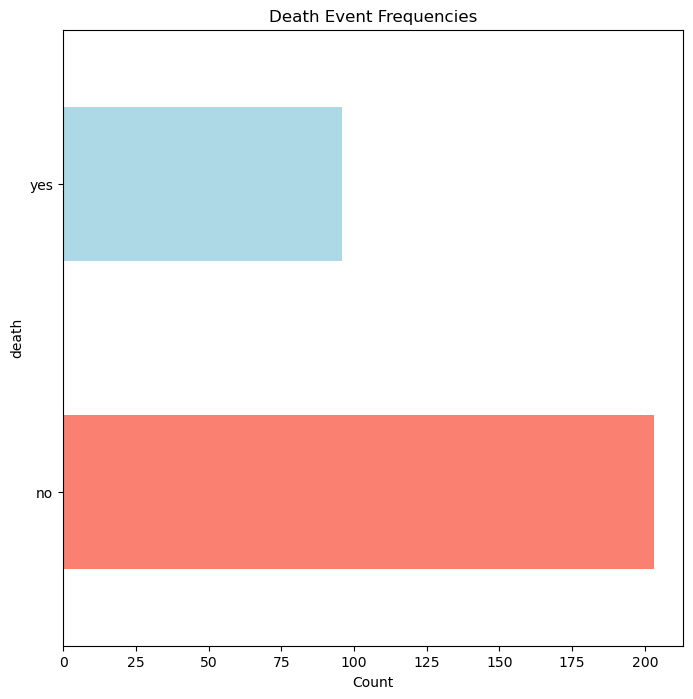

In [12]:
plt.figure(figsize=(8,8))
df2['DEATH_EVENT'].value_counts().plot.barh(color=['salmon','lightblue'])
plt.title('Death Event Frequencies')
plt.ylabel('death')
plt.xlabel('Count')
plt.show()

In [13]:
y = df2.groupby("DEATH_EVENT")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])
y

creatinine_phosphokinase        ejection_fraction         \
                                mean median              mean median   
DEATH_EVENT                                                            
no                        540.054187  245.0          40.26601   38.0   
yes                       670.197917  259.0          33.46875   30.0   

                 platelets           serum_creatinine        serum_sodium  \
                      mean    median             mean median         mean   
DEATH_EVENT                                                                 
no           266657.489901  263000.0         1.184877    1.0   137.216749   
yes          256381.044792  258500.0         1.835833    1.3   135.375000   

                          time         
            median        mean median  
DEATH_EVENT                            
no           137.0  158.339901  172.0  
yes          135.5   70.885417   44.5

## Death vs High blood pressure

In [14]:
df2.groupby(['sex', 'high_blood_pressure', 'DEATH_EVENT']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

DEATH_EVENT                       no       yes
sex    high_blood_pressure                    
female 0                    0.721311  0.278689
       1                    0.613636  0.386364
male   0                    0.699248  0.300752
       1                    0.639344  0.360656

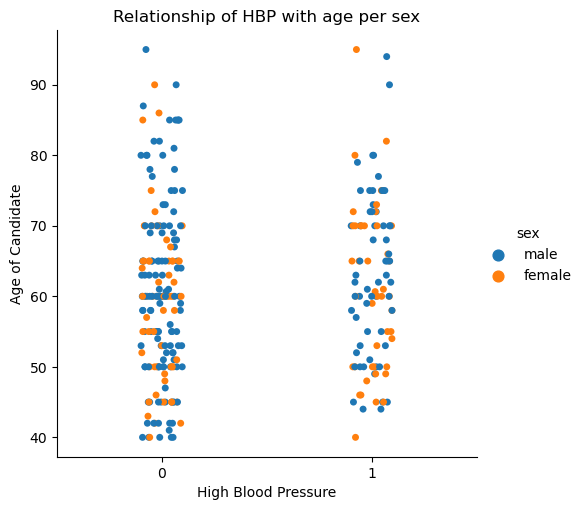

In [15]:
sns.catplot(
    x = "high_blood_pressure",
    y = "age",
    hue = "sex",
    data = df2
).set(xlabel="High Blood Pressure", ylabel="Age of Candidate", title="Relationship of HBP with age per sex")
plt.show()

In the female population, 28% of deaths happened in females with no high blood pressure and 39% of deaths happened in females with high blood pressure


in the male population, 30% of deaths happened in male with no high blood pressure and 36% of death happened in males with high blood pressure

## Death (Male vs Female)

In [16]:
pd.crosstab(df2['sex'], df2['DEATH_EVENT']).apply(lambda z: z/z.sum(), axis=1)

DEATH_EVENT,no,yes
sex,,
female,0.676190,0.323810
male,0.680412,0.319588


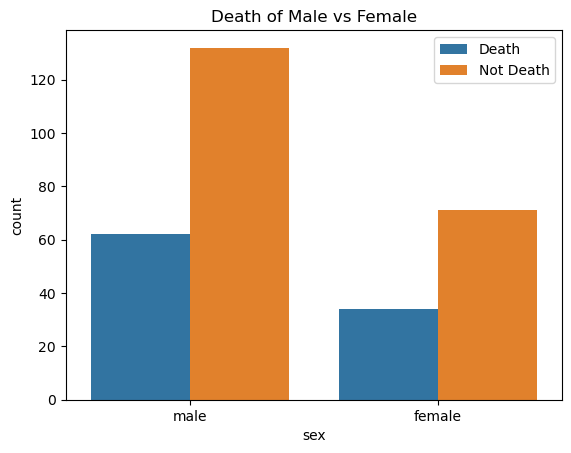

In [17]:
sns.countplot(x='sex', data=df2, hue=df2['DEATH_EVENT'])
plt.title('Death of Male vs Female')
plt.legend(labels=['Death','Not Death'])
plt.show()

The death percentage in both male and female are approximately 32%

## Death vs diabetes

In [18]:
pd.crosstab(df2['diabetes'], df2['DEATH_EVENT']).apply(lambda z: z/z.sum(), axis=1)

DEATH_EVENT,no,yes
diabetes,,
0,0.678161,0.321839
1,0.680000,0.320000


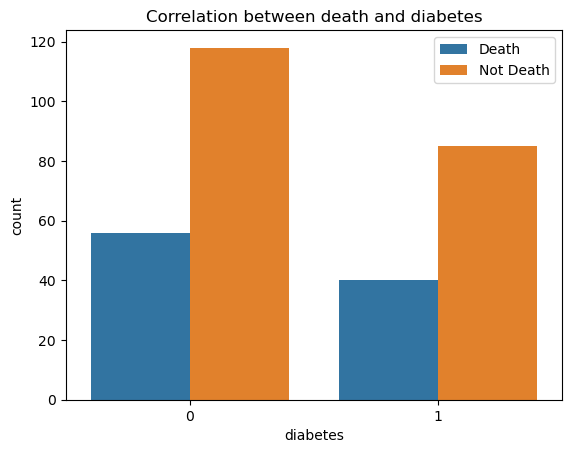

In [19]:
sns.countplot(x='diabetes', data=df2, hue=df2['DEATH_EVENT'])
plt.title('Correlation between death and diabetes')
plt.legend(labels=['Death','Not Death'])
plt.show()

The death for people with diabetes and not-diabetes are almost the same **32%**

## Death vs anemia

In [20]:
pd.crosstab(df2['anaemia'], df2['DEATH_EVENT']).apply(lambda z: z/z.sum(), axis=1)

DEATH_EVENT,no,yes
anaemia,,
0,0.705882,0.294118
1,0.643411,0.356589


Death for people with anaemia is **36%** while death for people without anaemia is **29%**

## Death vs smoking

In [21]:
pd.crosstab(df2['smoking'], df2['DEATH_EVENT']).apply(lambda z: z/z.sum(), axis=1)

DEATH_EVENT,no,yes
smoking,,
0,0.674877,0.325123
1,0.687500,0.312500


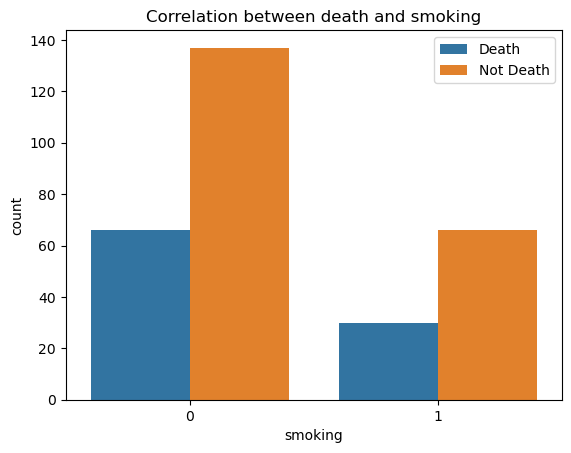

In [22]:
sns.countplot(x='smoking', data=df2, hue=df2['DEATH_EVENT'])
plt.title('Correlation between death and smoking')
plt.legend(labels=['Death','Not Death'])
plt.show()

## Check correlation between serum sodium and serum creatinine

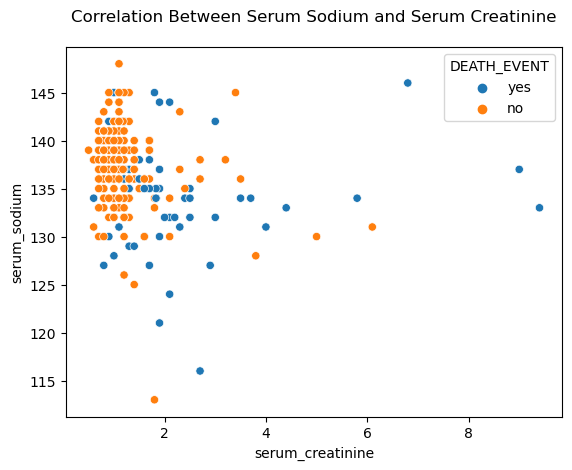

In [23]:
sns.scatterplot(x='serum_creatinine', y='serum_sodium', hue='DEATH_EVENT', data=df2)
plt.title('Correlation Between Serum Sodium and Serum Creatinine\n')
plt.show()

# relationship between age and platelets + sex

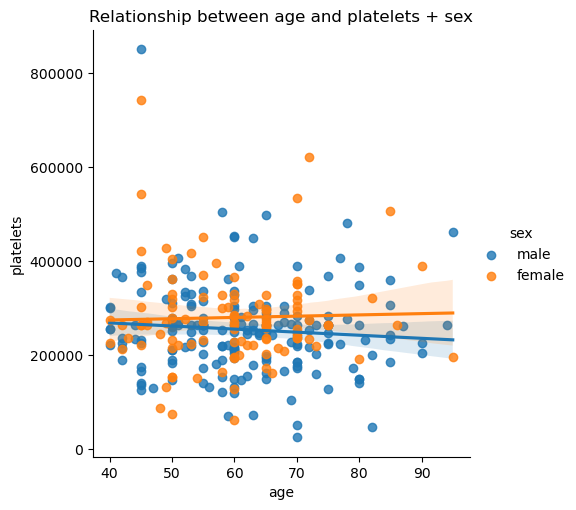

In [24]:
sns.lmplot(x = "age",
           y = "platelets",
           hue = "sex",
           data = df2).set(title='Relationship between age and platelets + sex')
plt.show()

platelets seem to be more common in males, rather than females. The average value of platelets seems to be 250,000–300,000 in both genders.